## Loading the packages

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [33]:
install.packages('Rcpp')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#install.packages('tidyr')
library(tidyr)

In [3]:
#install.packages('tidytext')
library(tidytext)

In [46]:
#install.packages('tidyverse')

also installing the dependency ‘lubridate’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [53]:
#remove.packages('lubridate')

Removing package from ‘/Users/a1/anaconda3/lib/R/library’
(as ‘lib’ is unspecified)
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
#install.packages('lubridate')
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [5]:
#install.packages('ggplot2')
library(ggplot2)

In [6]:
library(broom)
library(purrr)

In [7]:
#install.packages('readr')
library('readr')

In [8]:
library(stringr)

In [9]:
library(scales)


Attaching package: ‘scales’

The following object is masked from ‘package:readr’:

    col_factor

The following object is masked from ‘package:purrr’:

    discard



In [10]:
library(widyr)

In [11]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following objects are masked from ‘package:lubridate’:

    %--%, union

The following object is masked from ‘package:tidyr’:

    crossing

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [50]:
install.packages('udunits2', type = "source",
                     configure.args=c('--with-udunits2-lib=/Users/a1/anaconda/lib'))

Warning message in install.packages("udunits2", type = "source", configure.args = c("--with-udunits2-lib=/Users/a1/anaconda/lib")):
“installation of package ‘udunits2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [68]:
install.packages('units')

Warning message in install.packages("units"):
“installation of package ‘units’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [63]:
library(ggraph)

ERROR: Error in library(ggraph): there is no package called ‘ggraph’


In [51]:
devtools::install_github("thomasp85/ggraph", dependencies=TRUE)

ERROR: Error in loadNamespace(name): there is no package called ‘devtools’


## Import the dataset

The dataset contain review body, review date and ratings. There are total 4652 reviews in English for Grand Hyatt Hotel on TripAdvisor

In [12]:
grand <- read_csv('reviews.csv')
dim(grand)

Parsed with column specification:
cols(
  review_body = col_character(),
  review_date = col_character(),
  rating = col_double()
)


[1] 4652    3

In [13]:
head(grand)

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1

review_body,review_date,rating
"Our weekend at the Hyatt to celebrate our wedding anniversary was filled with surprises. The hotel upgraded our room, gave us a pass to the VIP Lounge and a couple of complimentary drinks to mark our special occasion. The staff was friendly, knowledgeable, professional, courteous and gracious. Couldn't ask for a better way to make this an anniversary to remember.",20-Nov-18,5
"We stayed here 4 nights the standards met were higher than expected. The location was fantastic - couldn<89>۪t get much closer to Union Square. Our rooms were spotless, very roomy and bed was extremely comfortable. View from window in15th floor was fab. We were allocated interconnecting rooms as we had requested and both rooms were lovely. I used the hotel gym which had an amazing view from 34th floor. The hotel staff were very attentive, friendly and made us feel very welcome. We would definitely recommend this hotel and would stay here again the next time we visit SF.",20-Sep-18,5
"The Hyatt is very central and convenient to walk to most places in the city which is a huge plus. However it wasn<89>۪t the best stay I<89>۪ve experienced by far. The room that I was first allocated had 2 double beds (for just 1 person), was cramped and you can hear the street noise. This was particularly evident because of the current protests happening at several hotels in the area, it is very loud and disturbing so be aware that this is going on all day and night until about 10pm. Ask for a room on the Stockton st side. It<89>۪s a shame that the receptionist didn<89>۪t mention anything about this when I checked in. I asked to be transferred to another room on the 2nd day, and it was rejected because they were booked up. On the 3rd day I asked again and the gentleman on reception transferred me straight away and was extremely helpful, even when I went back to check the room for my passport. Overall the king suite was very nice, the bed comfortable and the amenities all great. However there was a very bad smell coming from the drain in the bathroom that you could smell as soon as you walk in the door, luckily I spent most of the day away from the hotel, but it was very unpleasant. The room service food was pretty bland/average as well so I<89>۪d recommend going to a restaurant in the city or nearby as there are much better options available.",19-Nov-18,3
"This hotel is in a great location. The hotel rooms seem very dated and the bathrooms have no counter space to get ready because the sink is too big. The showers have a hand sprayer instead of a big shower head making the shower just ok. There is a strike at the Marriott across the street making it very loud at times from 6am-10pm. The Hyatt tried their best to accommodate this. Overall, the hotel was ok because could use some improvements.",18-Nov-18,3
"The location doesn't get much better than where the Hyatt is, next to union square, close to restaurants, shop and anything your heart can desire.The room was as you would expect of a luxury hotel: spacious, clean, large tv, good shower, electronic blinds and a spacious closet. I was up to the 7th floor and didn't hear many street noises, only in the background.Upon checkout, it appeared there was a mistake in my booking and they had expected me a day sooner (one night more). The staff was so kind to arrange things for me to get that night off the bill after I showed my paperwork. The only comment is about the breakfast. No complaints about the quality but it was incredibly expensive. A breakfast buffet is 34USD without tax and without tip. It came as a surprise to me and with a total cost of a whopping 43USD, the most expensive breakfast I have ever had anywhere in the world. Not worth it.All in all, I would stay here again...and get breakfast somewhere else.",15-Nov-18,4
"Dirty hallways, loud rooms, terrible restaurant food, over priced wine, treadmill didn<89>۪t work in the health club. Not worth the money. Lots of other great hotels aroun

Next, we want to turn review date data into date type

In [14]:
grand$review_date <- as.Date(grand$review_date, format = "%d-%B-%y")

### Exploratory Analysis

##### The number of review overtime
Reviews for Grand Hayatt Hotel started from 2003. From 2003-2010, the numbers of review per week was quite modest until 2011, it grew exponentially to 2016, and started declining from there.

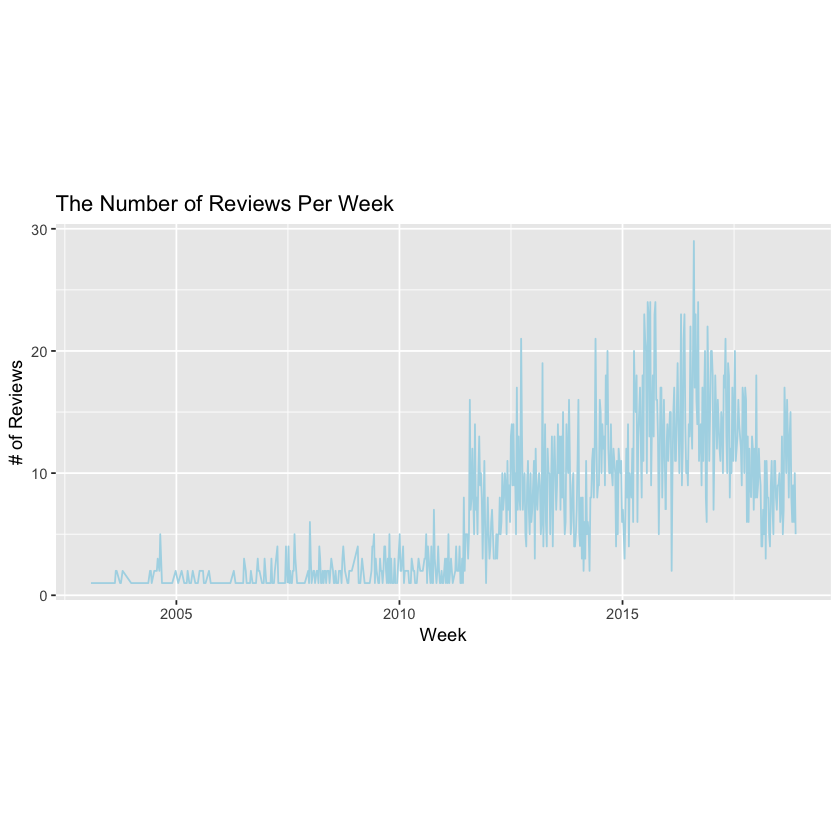

In [31]:
grand %>% 
  count(Week = round_date(review_date, "week")) %>% 
  ggplot(aes(Week,n)) + 
  geom_line(color = "lightblue") + 
  ggtitle("The Number of Reviews Per Week") +
  coord_fixed(ratio = 100) +
  labs (y = "# of Reviews")

##### The number of reviews by rating
80% of the reviews are positive (with 4 and 5 ratings), only 18% are 1, 2 and 3 ratings.

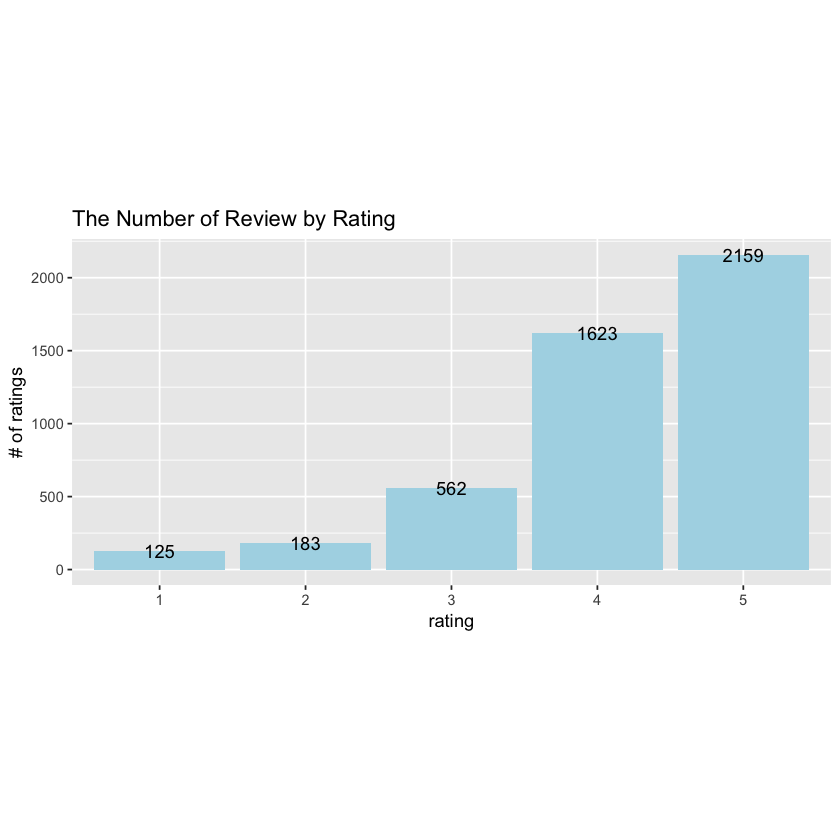

In [39]:
#The number of reviews by rating
grand$rating <- as.factor(grand$rating)
grand %>% 
  group_by(rating) %>% 
  count() %>% 
  ggplot(aes(rating, n)) + 
  geom_col(fill = "lightblue") + 
  geom_text(aes(label = n)) +
  ggtitle('The Number of Review by Rating') +
  labs (y = "# of ratings") + 
  coord_fixed(ratio = 0.001)

##### What are the most common words in the review text to date?
First of all, we want to add ID column to the dataset

In [40]:
grand <- tibble::rowid_to_column(grand, "ID")

Next, we created 2 new columns: one is to make the review date data into POSIXct data, second column is to extract month 

In [41]:
grand <- grand %>% 
  mutate(review_date = as.POSIXct(review_date, origin = "1970-01-01"), month = round_date(review_date, "month"))

To figure out which words are most common among the reviews, we need to tokenize the review body.
Unsurprisingly, words such as hotel, location, staff, stay are among the most common words in the review

In [44]:
review_words <- grand %>% 
  distinct(review_body, .keep_all = TRUE) %>% 
  unnest_tokens(word, review_body, drop = FALSE) %>% 
  distinct(ID, word, .keep_all = TRUE) %>% 
  anti_join(stop_words, by = "word") %>%  #remove stop words
  filter(str_detect(word, "[^\\d]")) %>% 
  group_by(word) %>% 
  mutate(word_total = n()) %>% 
  ungroup()

word_counts <- review_words %>% 
  count(word, sort = TRUE)

In [46]:
head(word_counts, 20)

word,n
hotel,3295
location,2403
staff,2122
stay,1884
union,1879
hyatt,1833
square,1821
stayed,1462
floor,1444
grand,1437


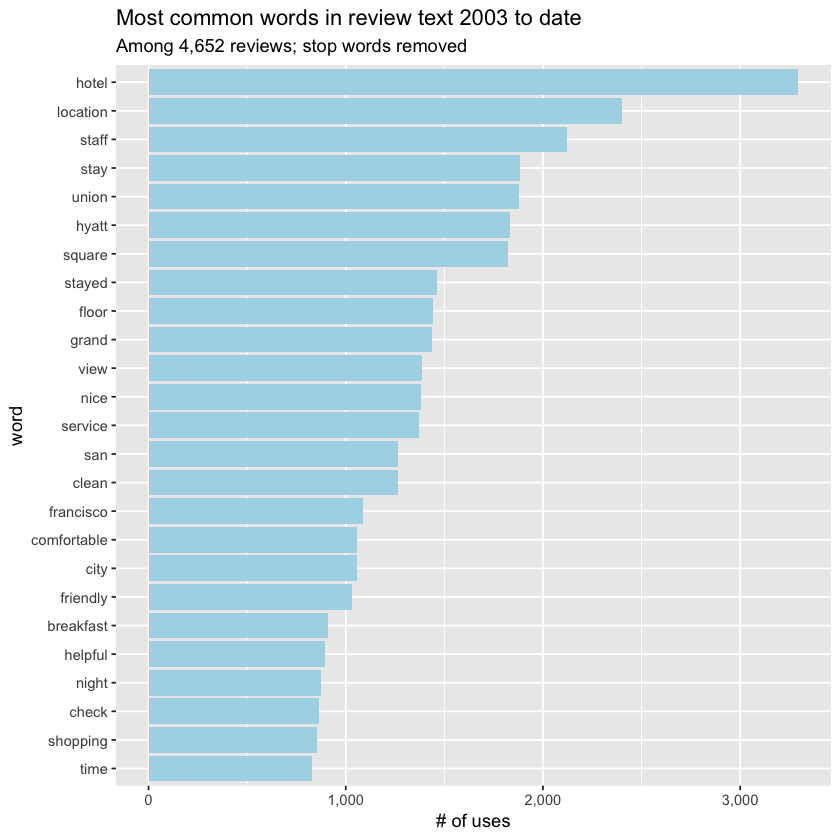

In [43]:
#Visualization
word_counts %>% 
  head(25) %>%   #only choose first 25 rows
  mutate(word = reorder(word,n)) %>%
  ggplot(aes(word, n)) +
  geom_col(fill = "lightblue") +  
  scale_y_continuous(labels = comma_format()) +
  coord_flip() +  #flip the coordinator to horizontal chart
  labs(title = "Most common words in review text 2003 to date",
       subtitle = "Among 4,652 reviews; stop words removed",
       y = "# of uses")

##### What are the most common words in the review for negative review (with rating of 1 and 2)

In general, there is no big difference between common words in negative reviews with all reviews. Except one thing that "Noise" becomes one of the common words in negative review. This gives us a hint that Grand Hayatt might have problem with "noise"

In [47]:
review_words_bad_rating <- grand %>%
  filter(rating %in% c(1,2)) %>%
  distinct(review_body, .keep_all = TRUE) %>%
  unnest_tokens(word, review_body, drop = FALSE) %>% 
  distinct(ID, word, .keep_all = TRUE) %>% 
  anti_join(stop_words, by = "word") %>%  #remove stop words
  filter(str_detect(word, "[^\\d]")) %>% 
  group_by(word) %>% 
  mutate(word_total = n()) %>% 
  ungroup()
word_counts_bad_rating <- review_words_bad_rating %>% 
  count(word, sort = TRUE)

In [48]:
head(word_counts_bad_rating, 20)

word,n
hotel,206
hyatt,157
stay,129
grand,106
service,106
night,104
stayed,101
staff,95
location,86
check,84


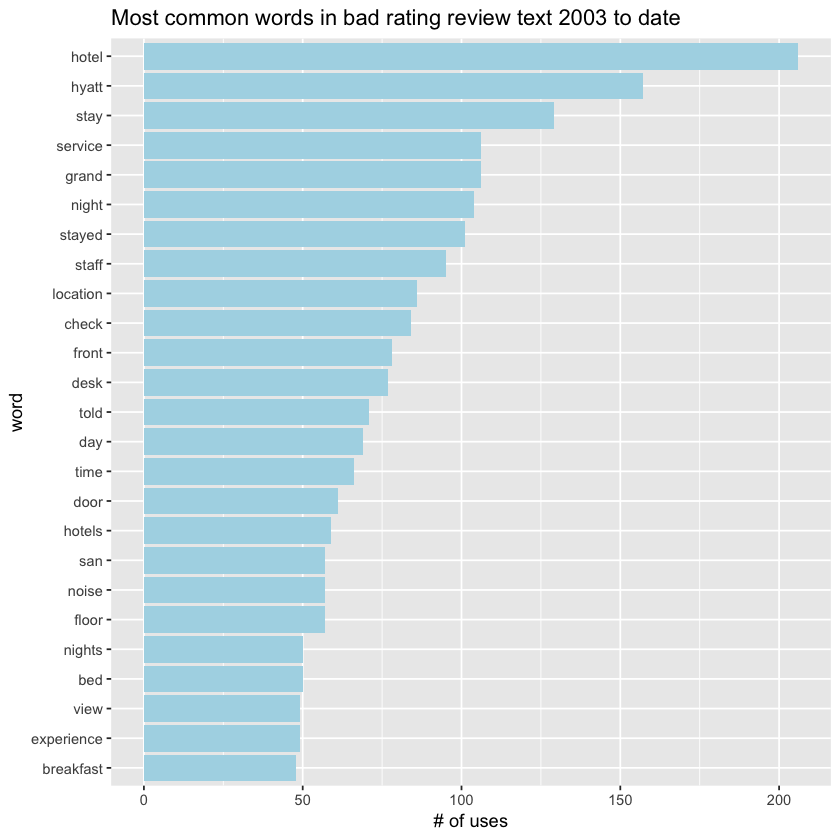

In [54]:
#Visualization
word_counts_bad_rating %>%
head(25) %>%   #only choose first 25 rows
  mutate(word = reorder(word,n)) %>%
  ggplot(aes(word, n)) +
  geom_col(fill = "lightblue") +  
  scale_y_continuous(labels = comma_format()) +
  coord_flip() +  #flip the coordinator to horizontal chart
  labs(title = "Most common words in bad rating review text 2003 to date",
       y = "# of uses") 

##### Biagram & Triagram
Sometimes using single words to indicate customer intention is not enough. That why we have biagram and triagram to have a better understanding of what customer want to mention. Again, we will compare the results between all reviews and only bad-rating reviews

Each 2 consecutive words in a sentence form a biagram

Each 3 consecutive words in a sentence form a triagram


In [55]:
review_biagrams <- grand %>%
  unnest_tokens(biagram, review_body, token = "ngrams", n = 2)
biagram_separated <- review_biagrams %>%
  separate(biagram, c('Word1', 'Word2'), sep = " ") 
biagram_filtered <- biagram_separated %>% 
  filter(!Word1 %in% stop_words$word) %>%
  filter(!Word2 %in% stop_words$word)
biagram_count <- biagram_filtered %>%
  count(Word1, Word2, sort = TRUE)

In [56]:
head(biagram_count, 20)

Word1,Word2,n
union,square,2099
grand,hyatt,1584
san,francisco,1356
front,desk,583
walking,distance,376
cable,car,238
top,floor,202
grand,club,189
highly,recommend,187
36th,floor,185


Biagram in bad-rating reviews give us a clearer picture of what customer are mentioning in their bad rating reviews. Potential areas for Grand Hayatt to investigate more is the issue related to "credit card", "air conditioning" and "customer service"

In [58]:
review_biagrams_bad_rating <- grand %>%
  filter(rating %in% c(1,2)) %>%
  unnest_tokens(biagram, review_body, token = "ngrams", n = 2)
biagram_separated <- review_biagrams_bad_rating %>%
  separate(biagram, c('Word1', 'Word2'), sep = " ") 
biagram_filtered <- biagram_separated %>% 
  filter(!Word1 %in% stop_words$word) %>%
  filter(!Word2 %in% stop_words$word)
biagram_count_bad_rating <- biagram_filtered %>%
  count(Word1, Word2, sort = TRUE)  


In [59]:
head(biagram_count_bad_rating, 20)

Word1,Word2,n
grand,hyatt,125
front,desk,100
san,francisco,55
union,square,45
customer,service,24
club,lounge,18
star,hotel,16
credit,card,15
hyatt,hotels,15
hyatt,san,15


##### Cannot visualization this type of network graph (=((()

In [32]:
#Visualization

review_subject <- grand %>% 
  unnest_tokens(word, review_body) %>% 
  anti_join(stop_words)
my_stopwords <- data_frame(word = c(as.character(1:10)))
review_subject <- review_subject %>% 
  anti_join(my_stopwords)
title_word_pairs <- review_subject %>% 
  pairwise_count(word, ID, sort = TRUE, upper = FALSE)
set.seed(1234)
title_word_pairs %>%
  filter(n >= 1000) %>%
  graph_from_data_frame() %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(edge_alpha = n, edge_width = n), edge_colour = "cyan4") +
  geom_node_point(size = 5) +
  geom_node_text(aes(label = name), repel = TRUE, 
                 point.padding = unit(0.2, "lines")) +
  ggtitle('Word network in TripAdvisor reviews')

Joining, by = "word"
Joining, by = "word"


ERROR: Error in ggraph(., layout = "fr"): could not find function "ggraph"


#### What are the group of 3 of words (triagram) that are most common among the review text?

In [46]:
review_triagrams <- grand %>% 
  unnest_tokens(triagram, review_body, token = "ngrams", n = 3)
triagram_separated <- review_triagrams %>%
  separate(triagram, c('Word1', 'Word2', 'Word3'), sep = " ") 
triagram_filtered <- triagram_separated %>% 
  filter(!Word1 %in% stop_words$word) %>%
  filter(!Word2 %in% stop_words$word) %>%
  filter(!Word3 %in% stop_words$word)
triagram_count <- triagram_filtered %>%
  count(Word1, Word2, Word3, sort = TRUE)
head(triagram_count,10)

Word1,Word2,Word3,n
grand,hyatt,san,151
hyatt,san,francisco,137
front,desk,staff,83
overlooking,union,square,66
grand,hyatt,sf,65
downtown,san,francisco,46
golden,gate,bridge,40
union,square,shopping,39
grand,club,lounge,36
flat,screen,tv,32


#### Trending in word review: What words have been increasing in frequency over time?

In [47]:
reviews_per_month <- grand %>%
  group_by(month) %>% summarize(month_total = n())

word_month_counts <- review_words %>% 
  filter(word_total >= 1000) %>%
  count(word, month) %>% 
  complete(word, month, fill =  list(n=0)) %>%
  inner_join(reviews_per_month, by = "month") %>%
  mutate(percent = n/month_total*100) %>%
  mutate(year = year(month) + yday(month)/365)
write.table(word_month_counts, file="text.csv",sep=",",row.names=F)
head(word_month_counts,10)

word,month,n,month_total,percent,year
city,2003-02-01,0,1,0.00000,2003.088
city,2003-06-01,0,2,0.00000,2003.416
city,2003-07-01,0,2,0.00000,2003.499
city,2003-08-01,0,3,0.00000,2003.584
city,2003-09-01,0,4,0.00000,2003.668
city,2003-10-01,0,2,0.00000,2003.751
city,2003-11-01,0,2,0.00000,2003.836
city,2004-01-01,0,1,0.00000,2004.003
city,2004-02-01,1,1,100.00000,2004.088
city,2004-03-01,0,2,0.00000,2004.167


## Sentiment Analysis

##### Methodology

We will use Bing Sentiment dictionary available in R (which define the sentiment strongly associated with each word). 
To figure out the sentiment associated with a review, here is our methodology:
+ First, we tokenize the review into words
+ Then we find the sentiment associated with each word by joining with sentiment dictionary
+ Next, we count the number of positive and negative words in the review.

If the number of positive words is higher than the number of negative words, it will be a positive review and vice versa.
Using this method, we come up with 3915 positive reviews, 455 negative reviews and 248 neutral reviews.

In [108]:
reviews <- grand %>% 
  filter(!is.na(review_body)) %>% 
  select(ID, review_body, rating) %>% 
  group_by(row_number()) %>% 
  ungroup()

tidy_reviews <- reviews %>%
  unnest_tokens(word, review_body)
tidy_reviews <- tidy_reviews %>%
  anti_join(stop_words)

Joining, by = "word"


In [71]:
bing_word_counts <- tidy_reviews %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


In [76]:
sentiment_messages <- tidy_reviews %>%
  inner_join(get_sentiments('bing'), by = "word") %>%
  group_by(ID, sentiment) %>% 
  summarize (n = n()) %>%
  spread(sentiment,n, fill = 0) %>%
  mutate(Difference = positive - negative) %>%
  mutate(Sentiment = ifelse(Difference > 0, "Positive", ifelse (Difference == 0, "Neutral", "Negative"))) %>%
  group_by (Sentiment) %>%
  summarize (Num_Review = n())

In [77]:
sentiment_messages

Sentiment,Num_Review
Negative,455
Neutral,248
Positive,3915


##### Rating Distribution & Accuracy

Using this methodology for sentiment analysis, we see that some reviews that are associated with positive still have 1 and 2 rating, indicating that this is more likely to be a bad review. On the other hand, some reviews that are associated with negative still have 4 and 5 rating, indicating that this is more likely to be a good review. 

The accuracy is 80.7%

In [118]:
sentiment_messages_2 <- tidy_reviews %>%
  inner_join(get_sentiments('bing'), by = "word") %>%
  group_by(ID, sentiment, rating) %>% 
  summarize (n = n()) %>%
  spread(sentiment,n, fill = 0) %>%
  mutate(Difference = positive - negative) %>%
  mutate(Predicted_Sentiment = ifelse(Difference > 0, "Positive", ifelse (Difference == 0, "Neutral", "Negative"))) %>%
  mutate(True_sentiment =  ifelse(rating == 5, "Positive", ifelse(rating == 4, "Positive", ifelse(rating == 1, "Negative",
                                                                                                   ifelse(rating == 2, "Negative", "Neutral")))))




In [129]:
acc <- sentiment_messages_2 %>%
  filter(Predicted_Sentiment == True_sentiment)
accuracy <- nrow(acc)/nrow(sentiment_messages_2)*100
accuracy

[1] 80.74924

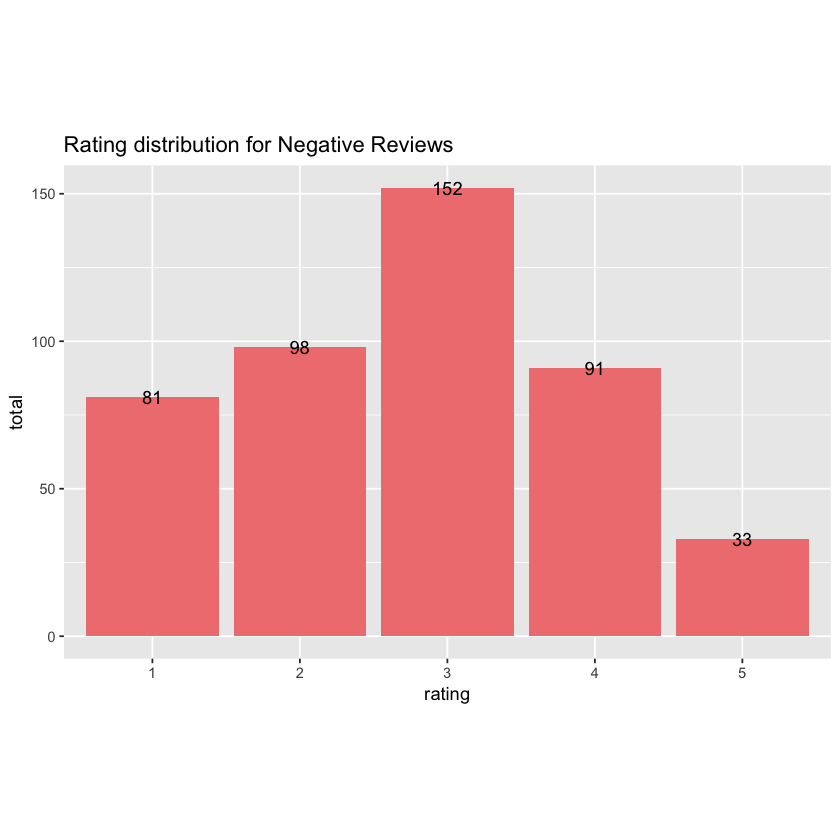

In [105]:
comparing <- grand %>%
  inner_join(sentiment_messages_2, by = "ID")
rating_distribution_1 <- comparing %>%
  filter(Sentiment == "Negative") %>%
  group_by(rating) %>%
  summarize (total = n()) %>%
  ggplot(aes(rating, total)) + 
  geom_col(fill = "lightcoral") + 
  ggtitle('Rating distribution for Negative Reviews') +
  coord_fixed(ratio = 0.02) +
  geom_text(aes(label = total))
rating_distribution_1

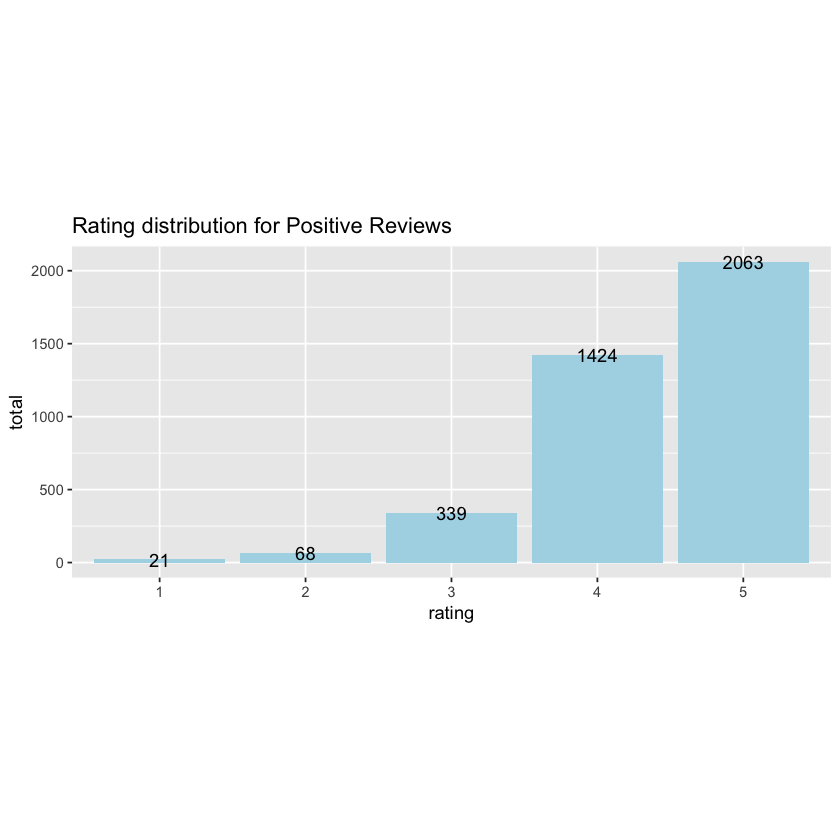

In [106]:
rating_distribution_2 <- comparing %>%
  filter(Sentiment == "Positive") %>%
  group_by(rating) %>%
  summarize (total = n()) %>%
  ggplot(aes(rating, total)) + 
  geom_col(fill = "lightblue") + 
  ggtitle('Rating distribution for Positive Reviews') +
  coord_fixed (ratio = 0.001) +
  geom_text(aes(label = total))
rating_distribution_2

##### The words that contribute the most to negative and positive reviews
"Noise", "Noisy", "Loud" are the words that contribute the most to "negative" review. This confirm our hypothesis that Grand Hayatt Hotel has some problem with noise and this problem is complained the most by customer.

Another thing that customers complain in the negative reviews is "expensive", indicating that some customers don't perceive that they receive enough value compared with what they pay.

Selecting by n


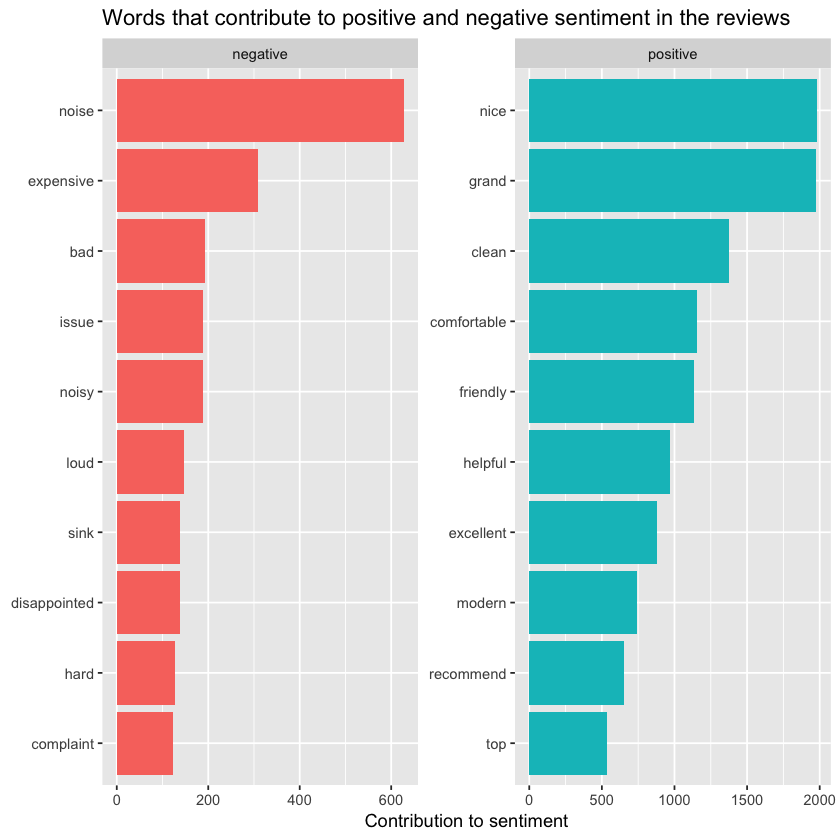

In [49]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free") +
  labs(y = "Contribution to sentiment", x = NULL) +
  coord_flip() + 
  ggtitle('Words that contribute to positive and negative sentiment in the reviews')

## Key Findings, Conclusion & Limitation

So far we have done the exploratory analysis (aka text mining) and simple sentiment analysis for Grand Hayatt reviews. Our sentiment analysis achieved an accuracy of 80.7%, which in our opinion is good enough to generate credible information. 

Here are the key insights for the hotel owner:
+ Customers like the bay view, friendliness, comfortability of Grand Hayatt. However, the delight for "View" has been declining 
+ Regarding the complains, Grand Hayatt might want to do more investigation toward "noise", "credit card", "air conditioning" issues that customers mention quite often in their complains

Limitation of this analysis includes:
+ Unstructured text is complicated and our analysis didn't take into account the negation (words such as "no", "not"), the irony, and multi-meaning of languagues 